# Super Store Exploratory Data Analysis Project

## Introduction

   For this data analysis project, I am going to look at the Superstore sample dataset from the Tableau website. This set contains data from several thousand orders from a company that sells office supplies and furniture. It also several useful variables such as order and shiping dates, profit, sales numbers, quantity sold, locations where the orders were placed, and it divides all the available products into categories and sub-categories. 
   
   Using this data, I am going to explore three general questions:
   1. What geographic areas were most profitable and which were the least profitable.
   2. Which products were most profitable and which were the least profitable.
   3. How did sales and profits change over time.

**Preparing the data**

First step is importing libraries and the data set
- pandas and numpy for data manipulation
- matplotlib for data visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
superstore = pd.read_excel(r"C:\Users\dusti\OneDrive\Documents\Sample - Superstore.xlsx", sheet_name = "Orders")

Now lets look at the data using the head() function.

Some variables have been cut off in order to fit on the screen but we can still get a general idea about what the dataset contains. First the information about the orders, then info about the customers, next geographical information, then information about the products in each order, and finally the sales data.

In [2]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
2,39,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764
3,190,CA-2015-102281,2015-10-12,2015-10-14,First Class,MP-17470,Mark Packer,Home Office,United States,New York City,...,10035,East,FUR-BO-10002613,Furniture,Bookcases,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",899.1360,4,0.20,112.3920
4,193,CA-2015-102281,2015-10-12,2015-10-14,First Class,MP-17470,Mark Packer,Home Office,United States,New York City,...,10035,East,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",626.3520,3,0.20,46.9764


With the info() function we can get a list of all the variables and their type. We can also see that this dataset contains 9994 rows.

In [3]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Now we will check for duplicates. First I am dropping the Row ID variable since it is superfluous and not needed for our analysis and will obscure results. Then rows are assigned a value of 1 if they are duplicates of another row, and 0 if they are not. By adding them all up we can get a count for how many duplicated rows are in the dataset. The sum here is 2 so this means that two rows have the exact same values.

In [4]:
superstore = superstore.drop(['Row ID'], axis = 1)
superstore.duplicated(keep=False).sum()

2

Now I will print the two duplicate rows

In [5]:
superstore[superstore.duplicated(keep = False)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
430,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
431,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


Now we will drop one of the duplicate rows.

In [6]:
superstore.drop_duplicates(inplace = True)

Next we will check to see if there are any null values. Using the isnull() function we can see that there are no null values meaning this is a very clean dataset.

In [7]:
superstore.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Next I want to get some descriptive statistics for the numeric variables. The Postal Code column isn't very useful but the other four columns give us a nice snapshot of the shape of the data. The Sales column tells us that the bulk of orders generate relatively low sales (ranging from less than a dollar to about 50 dollars). The mean being above 75% of the data tells us that there are also a lot of orders that had very high sales numbers (the largest being an order for over \\$22,000 of products).

Quantity tells us that each order contains between 1 and 14 items. Discount shows on average orders had about a 20\% discount rate.

Finally, the Profit column shows that the average profit per order is fairly low. over 25\% of orders had profits of less than \\$2, with the lowest being a loss of \\$6,600. The average profit is \$28 with the highest profit generated by an order being \\$8,400.
Without proper industry context I can't say if these numbers are good or bad but to me the most concerning part is the high number of orders that resulted in losses especially losses in the thousand of dollars.

In [8]:
superstore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55191.576403,229.852846,3.789753,0.156188,28.660971
std,32065.074478,623.276074,2.225149,0.206457,234.271476
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.731000
50%,56560.000000,54.480000,3.000000,0.200000,8.671000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Finally I want to get the total profit and total sales 

In [9]:
sum(superstore.Profit)

286409.0804999995

In [10]:
sum(superstore.Sales)

2296919.4882999673

These quick sums show that despite having sales of about \\$2,230,000 the actual profit was only around \\$286,000. The profit margin is over 12\%, which according to cursory research seems to be fairly high for retail so  might actually be able to conclude the business is doing well despite some losses.

## 1. What geographic areas are most profitable

The Next aspect I want to look at is how the data breaks down by geographic area. The geographic aspect of the data is held in five variables: Country, City, State, Postal Code, and Region. The country variable is superfluous since all the orders came from only one country, the United States. So instead I first want to start with the data grouped by region.

In [11]:
Region_Profit = superstore.groupby(['Region'],as_index = False)['Profit'].sum()
Region_Sales = superstore.groupby(['Region'],as_index = False)['Sales'].sum()
Region_Quantity = superstore.groupby(['Region'],as_index = False)['Quantity'].sum()

We can see from the following graph that the West and East regions had the highest total profit, while the total profits for the Central and South regions were significantly lower.

<Axes: title={'center': 'Total Profits By Region'}, xlabel='Region'>

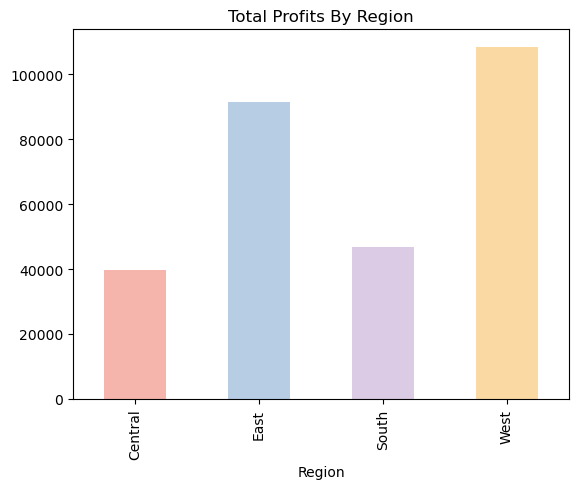

In [12]:
Region_Profit.plot(x='Region',y='Profit',kind='bar', 
                   title = 'Total Profits By Region', legend = 0, color=['#F5B4AC','#B6CDE4','#DCCBE5','#FAD9A2'])

The same pattern holds for total sales with the West and East having the highest and the Central and South having the lowest. 

<Axes: title={'center': 'Total Sales By Region'}, xlabel='Region'>

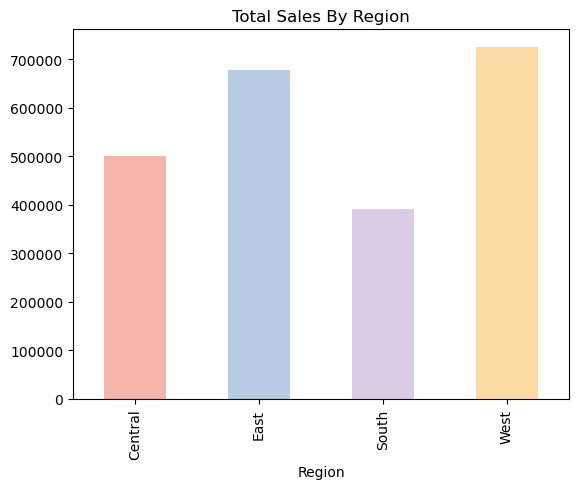

In [13]:
Region_Sales.plot(x='Region',y='Sales',kind='bar',title = 'Total Sales By Region', 
                  legend = 0, color=['#F5B4AC','#B6CDE4','#DCCBE5','#FAD9A2'])

Looking at the total quantity of products sold we can see that this graph is very similar to the previous graph. Which makes sense since the amount of products sold should influence the total sales (e.i. the more products sold the more sales are made).

<Axes: title={'center': 'Total Quantity Sold By Region'}, xlabel='Region'>

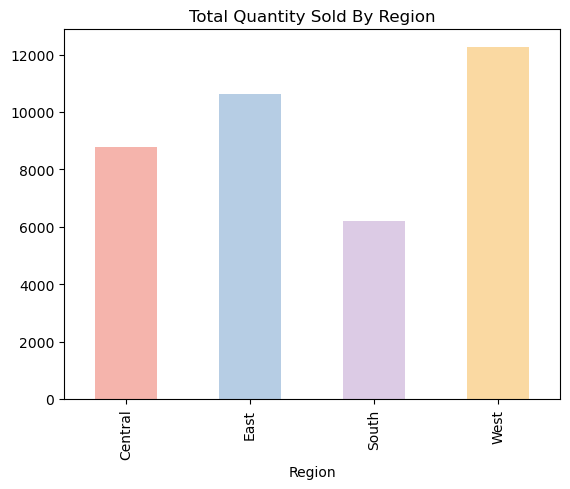

In [14]:
Region_Quantity.plot(x='Region',y='Quantity',kind='bar', title = 'Total Quantity Sold By Region', 
                     legend = 0, color=['#F5B4AC','#B6CDE4','#DCCBE5','#FAD9A2'])

A sub question we could ask is how much of the total sales was converted into profit. How does the profit to sales ratio compare for each region?

In [15]:
Profit_Ratio = pd.DataFrame()
Profit_Ratio['Region'] = Region_Profit['Region']
Profit_Ratio['Ratio'] = Region_Profit['Profit'] / Region_Sales['Sales']
Profit_Ratio

,Region,Ratio
0,Central,0.079216
1,East,0.134908
2,South,0.119343
3,West,0.149448


From this we can see that the Central region has the worst performance with a profit to sales ratio of only 7 percent while the other 3 regions have similar ratios ranging from 12\% to 15\%. This means that while the South had lower profits and sales, proportionately it is still on parity with the West and East.

Next we will look at the data grouped by state. Because there are 50 states there will be too much data to make readable graphs with so instead I am just going to print the 10 states with the lowest profits and then the 10 states with the highest profits since these are the most important.

In [16]:
State_Profit = superstore.groupby(['State'],as_index = False)['Profit'].sum().sort_values(by='Profit')

In [17]:
State_Profit.head(10)

,State,Profit
41,Texas,-25729.3563
33,Ohio,-16959.3178
36,Pennsylvania,-15559.9603
11,Illinois,-12607.8870
31,North Carolina,-7490.9122
4,Colorado,-6527.8579
40,Tennessee,-5341.6936
1,Arizona,-3427.9246
8,Florida,-3399.3017
35,Oregon,-1190.4705


In the table above we can see that ten worst performing states. Convienently these are also the only states that had net losses. Texas had the worst profit rate with a loss of over \\$25,0000.

In [18]:
State_Profit.tail(10)

,State,Profit
6,Delaware,9977.3748
21,Minnesota,10823.1874
15,Kentucky,11199.6966
9,Georgia,16250.0433
12,Indiana,18382.9363
44,Virginia,18597.9504
20,Michigan,24463.1876
45,Washington,33402.6517
30,New York,74038.5486
3,California,76381.3871


The ten best perfoming states (sorted from lowest to highest) are listed in the table above. California and New York performed the best. However there doesn't seem to be any pattern in which state performed well and which performed poorly with both kinds distributed fairly evenly across the United States.

Here the two tables are presented as a bar graph for easier comparison.

<Axes: title={'center': 'Total Profits by State'}, xlabel='State'>

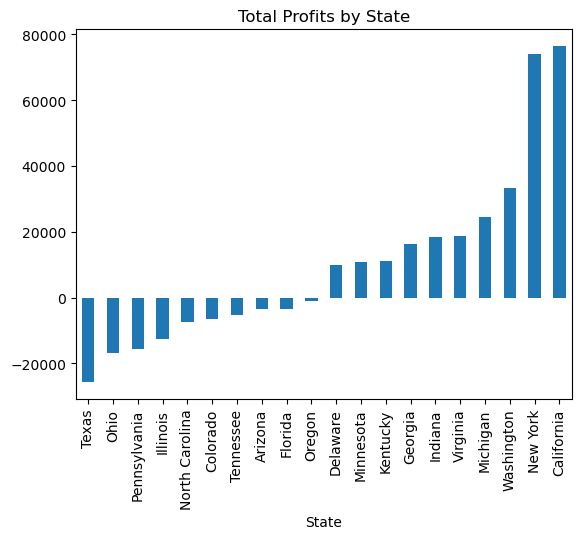

In [19]:
pd.concat([State_Profit.head(10), State_Profit.tail(10)]).plot(x='State', y='Profit', kind='bar', 
                                                               title = 'Total Profits by State', legend=0)

To finish this section I present the 5 least profitable cities and the 5 most profitable cities.

In [20]:
City_Profit = superstore.groupby(['City','State'],as_index = False)['Profit'].sum().sort_values(by='Profit')
print(r'5 Cities with the Lowest Total Profit')
print(City_Profit.head(5))
print()
print()
print(r'5 Cities with the Highet Total Profit')
print(City_Profit.tail(5))

5 Cities with the Lowest Total Profit
             City         State      Profit
430  Philadelphia  Pennsylvania -13837.7674
239       Houston         Texas -10153.5485
499   San Antonio         Texas  -7299.0502
283     Lancaster          Ohio  -7149.6180
90        Chicago      Illinois  -6654.5688


5 Cities with the Highet Total Profit
              City       State      Profit
143        Detroit    Michigan  13181.7908
503  San Francisco  California  17507.3854
517        Seattle  Washington  29156.0967
312    Los Angeles  California  30440.7579
380  New York City    New York  62036.9837


# 2. What categories of products are the most profitable?

The next question concerns the profitability of the different categories and sub-cateogries that all the company's products have been grouped into.

First I am going to create some new dataframes with the relevant data from the superstore data set.

In [21]:
Category_Profit = superstore.groupby(['Category'],as_index = False)['Profit'].sum()
Category_Sales = superstore.groupby(['Category'],as_index = False)['Sales'].sum()
Category_Quantity = superstore.groupby(['Category'],as_index = False)['Quantity'].sum()

The first graph is of the total profits grouped by the 3 categories (Furniture, Office Supplies, and Technology). We can see that Technology is the most profitable category and that Furniture is the least profitable by a very significant margin.

<Axes: title={'center': 'Total Profits By Category'}, xlabel='Category'>

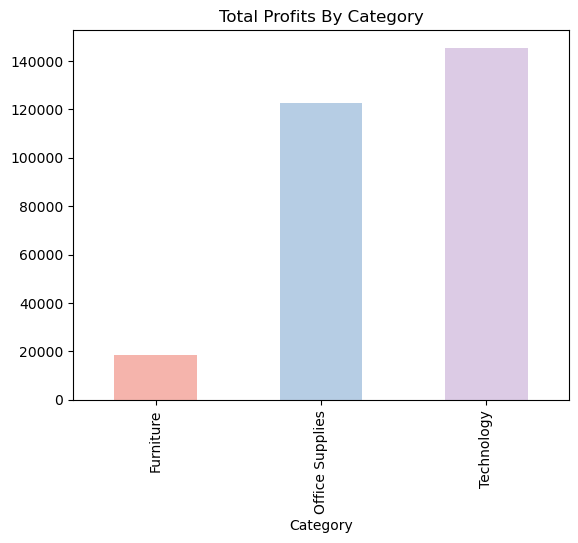

In [22]:
Category_Profit.plot(x='Category',y='Profit',kind='bar', title = 'Total Profits By Category', 
                     legend=0, color=['#F5B4AC','#B6CDE4','#DCCBE5'])

Next is a bar graph of the total sales for each category. Here we can observe that the total sales is roughly the same for each product. Comparing it to the previous graph means that the Furniture category had a much lower profit margin than the other two categories. Presumably this is because it is much more expensive to store and ship pieces of furniture than it is for smaller tech devices or office supplies.

<Axes: title={'center': 'Total Sales By Category'}, xlabel='Category'>

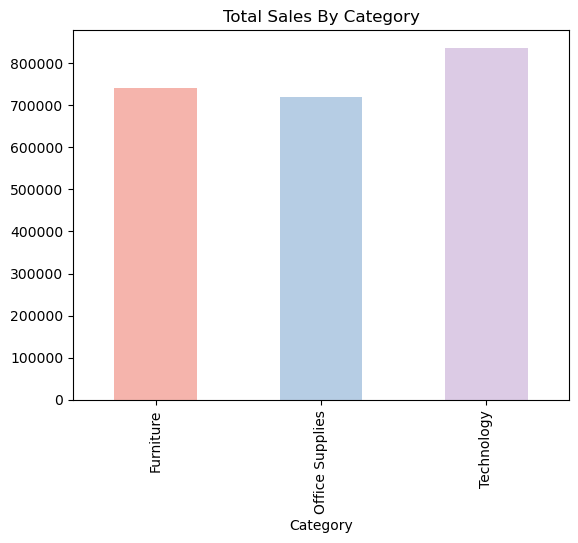

In [23]:
Category_Sales.plot(x='Category',y='Sales',kind='bar', title='Total Sales By Category', 
                    legend =0, color=['#F5B4AC','#B6CDE4','#DCCBE5'])

Finally a bar graph of the total quantity of items sold. We can see that by a large margin Office Supplies shipped out the highest number of products. This is probably because a lot of people and companies buy office supplies in bulk.

<Axes: title={'center': 'Total Quantity Sold By Category'}, xlabel='Category'>

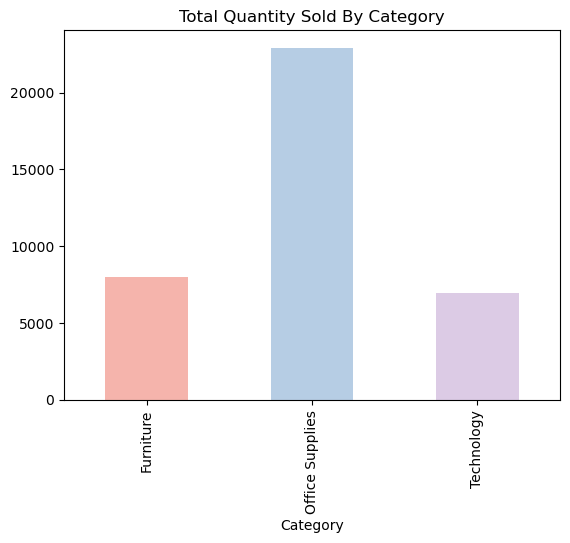

In [24]:
Category_Quantity.plot(x='Category',y='Quantity',kind='bar', title = 'Total Quantity Sold By Category', 
                       legend=0, color=['#F5B4AC','#B6CDE4','#DCCBE5'])

Next is a bar graph of the total products broken down into sub category and ranked from most profitable down to the least profitable. Copiers are the most profitable sub category while Tables, Bookcases, and Supplies were the three subcategories that had net losses, with Tables being the least profitable with a loss of nearly \$20000.

<Axes: title={'center': 'Total Profit By Subcategory'}, xlabel='Sub-Category'>

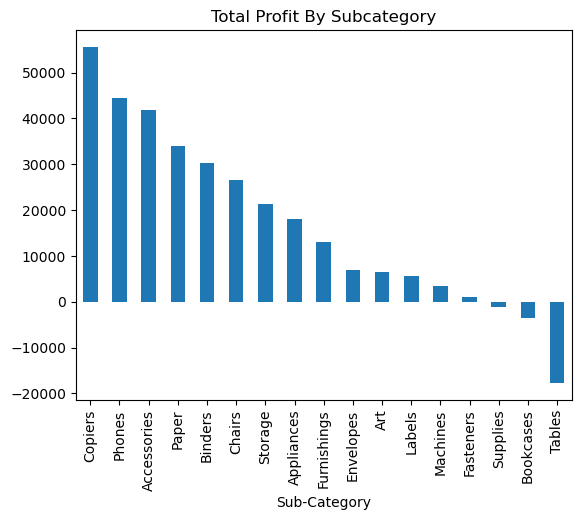

In [25]:
superstore.groupby(['Sub-Category'],as_index = False)['Profit'].sum().sort_values(by="Profit",ascending=False).plot.bar(x='Sub-Category',y='Profit', 
                                                                                                                        title='Total Profit By Subcategory',legend=0)

Next we have a bar graph of total sales by subcategory. Chairs and Phones are tied with the highest total sales while Fasteners had the lowest.

<Axes: title={'center': 'Total Sales By Subcategory'}, xlabel='Sub-Category'>

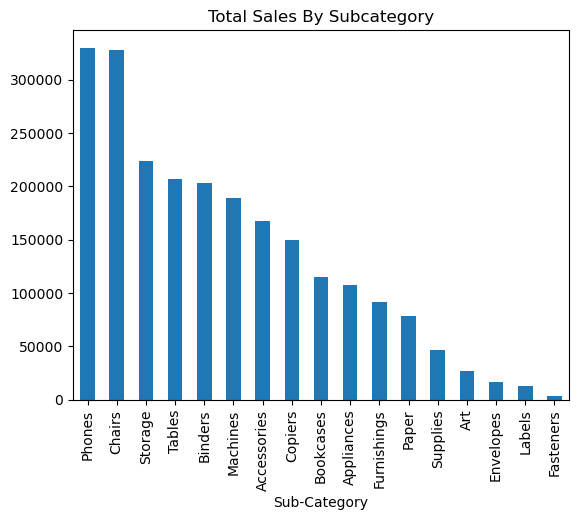

In [26]:
superstore.groupby(['Sub-Category'],as_index = False)['Sales'].sum().sort_values(by="Sales",ascending=False).plot.bar(
    x='Sub-Category',y='Sales', title='Total Sales By Subcategory', legend=0)

The final bar graph is for the subcategories broken down by total quantity sold. Binders sold the highest number and copiers sold the lowest>

<Axes: title={'center': 'Total Quantity Sold By Subcategory'}, xlabel='Sub-Category'>

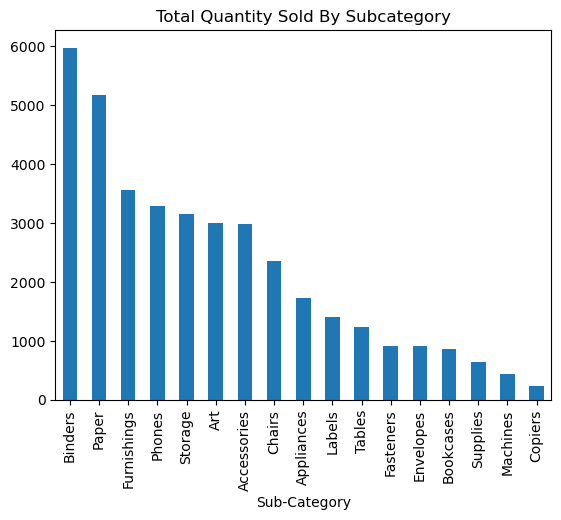

In [27]:
superstore.groupby(['Sub-Category'],as_index = False)['Quantity'].sum().sort_values(by="Quantity",ascending=False).plot.bar(
    x='Sub-Category',y='Quantity',title='Total Quantity Sold By Subcategory',legend=0)

# 3 How did sales and profits change over time

The final question I want to answer is how total profit and total sales changed over time by finding the total for each year. To do this I am first going to get the relevant columns from the superstore data set.

In [28]:
Date_Sales = superstore[['Order ID', 'Order Date', 'Quantity', 'Sales', 'Profit']]

Next, in order to make graphing easier I want to create a new column that holds the date when the order was placed. I will do this by extracting the year from the Order Date column.

In [29]:
Date_Sales['Year'] = pd.DatetimeIndex(Date_Sales['Order Date']).year
Date_Sales.head()

,Order ID,Order Date,Quantity,Sales,Profit,Year
0,CA-2016-152156,2016-11-08,2,261.9600,41.9136,2016
1,US-2015-150630,2015-09-17,7,3083.4300,-1665.0522,2015
2,CA-2015-117415,2015-12-27,3,532.3992,-46.9764,2015
3,CA-2015-102281,2015-10-12,4,899.1360,112.3920,2015
4,CA-2015-102281,2015-10-12,3,626.3520,46.9764,2015


So we can see that, for example, the first order was placed on November 8, 2016 and so now the new year column that we created contains the number 2016 in the first row.

For the first graph I want to show the total profit by year. We can see that profits grew steadily each year from 2014 to 2017.

<Axes: title={'center': 'Total Profits by Year'}, xlabel='Year'>

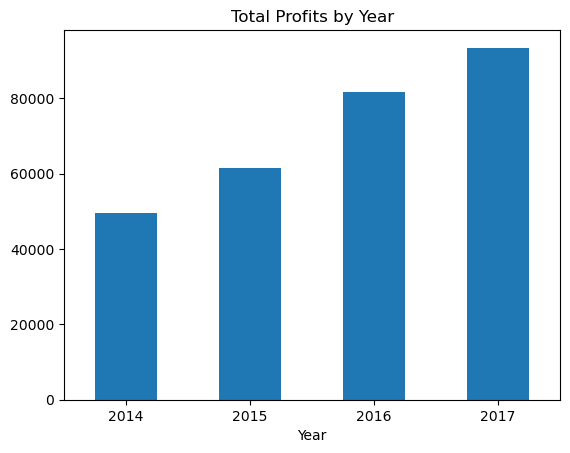

In [30]:
Date_Sales.groupby(['Year'])['Profit'].sum().plot.bar(x='Year',y='Profit',title='Total Profits by Year',rot=0)

Next looking at total Sales for each year we can see that sales fell slightly between 2014 and 2015 but then rose significantly in 2016 and again 2017. 

<Axes: title={'center': 'Total Sales by Year'}, xlabel='Year'>

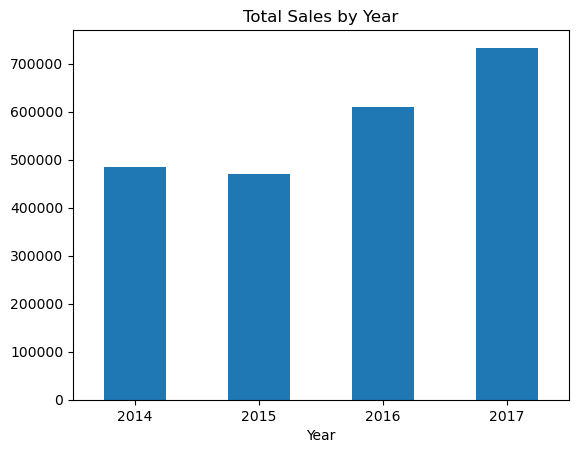

In [31]:
Date_Sales.groupby(['Year'])['Sales'].sum().plot.bar(x='Year',y='Sales',title='Total Sales by Year',rot=0)

The final graph is for total quantity sold per year. Here the yearly upward trend holds as well. Between these three bar graphs we can observe that the business seems to be doing well and that it is growing steadily every year.

<Axes: title={'center': 'Total Quantity of Products Sold by Year'}, xlabel='Year'>

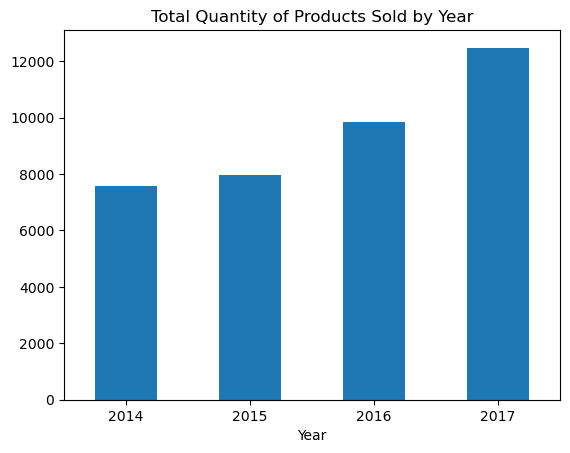

In [32]:
Date_Sales.groupby(['Year'])['Quantity'].sum().plot.bar(x='Year',y='Quantity Sold',title='Total Quantity of Products Sold by Year',rot=0)

# Conclusion

In this analysis we looked at three questions.

1. First we analyzed in which geographic areas does the company perform the best. 

We found that the Eastern and Western regions of the US had the best performance which makes sense given that these regions have several large cities meaning more potential customers. California and New York were the best performing states. Several states had net losses and future analysis should be geared to understanding why so much money was lost in these states.

2. Next we asked which category of products performed the best. 

In this we saw that technology and office supplies had the highest profits while furniture was the worst performing category. 

3. Finally we looked at how profits changed over time 

Here we found that fortunately the company is growing steadily every year. 

Overall it seems that the Superstore company is doing well and can expect future growth if the trends continue. However, there are a few areas where the company had major losses (10 states had negative profits) and future planning and analysis should be focused on understanding why these areas performed poorly and how they can be remedied.